<a href="https://colab.research.google.com/github/sa2shun/DataScienceFromScrach/blob/master/analytics_infocsv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pwd

/content


In [ ]:
#read the data
df = pd.read_csv('info.csv')

In [ ]:
#check the data
df.head(5)

,raw_stem,raw_product_id,timestamp,received_date,product_type,camera_id,crop_type,camera_angle,product_id,stem,has_kizu_dakon,has_kizu_ware,has_kizu_zairyou,has_ignore_shallow,has_ignore_cutting,has_ignore_oil,has_sabi,has_unuse,is_anomaly_image,is_anomaly_product,data_block_id
0,301_20200825125742545,301,20200825125742545,20201005,H,2,uncrop,0,20200825125742545,20200825125742545_2_0_uncrop,0,0,0,1,0,0,1,0,0.0,1.0,8
1,301_20200825125744498,301,20200825125744498,20201005,H,2,uncrop,1,20200825125742545,20200825125742545_2_1_uncrop,1,0,0,1,0,0,1,0,1.0,1.0,8
2,301_20200825125747298,301,20200825125747298,20201005,H,2,uncrop,2,20200825125742545,20200825125742545_2_2_uncrop,1,0,0,0,0,0,1,0,1.0,1.0,8
3,301_20200825125748732,301,20200825125748732,20201005,H,2,uncrop,3,20200825125742545,20200825125742545_2_3_uncrop,1,0,0,0,0,0,1,0,1.0,1.0,8
4,301_20200825125750683,301,20200825125750683,20201005,H,2,uncrop,4,20200825125742545,20200825125742545_2_4_uncrop,1,0,0,0,0,0,1,0,1.0,1.0,8


In [ ]:
df['crop_type'][1]

'uncrop'

In [ ]:
# To extract df_uncrop and df_tobu_or_ziku, df.loc is better than for loop
df_uncrop = df.loc[df["crop_type"] == "uncrop", :]
df_tobu = df.loc[df["crop_type"] == "tobu", :]
df_ziku = df.loc[df["crop_type"] == "ziku", :]
df_tobu_or_ziku = pd.concat([df_tobu, df_ziku])

In [ ]:
#reset the index
df_uncrop = df_uncrop.reset_index()
df_tobu_or_ziku = df_tobu_or_ziku.reset_index()

In [ ]:
#check the number of culumns
print(f"df_uncrop:{len(df_uncrop)},df_tobu_or_ziku:{len(df_tobu_or_ziku)}")

df_uncrop:4344,df_tobu_or_ziku:8688


In [ ]:
# groupby is useful
columns = ['has_kizu_dakon', 
           'has_kizu_ware', 
           'has_kizu_zairyou',
           'has_ignore_shallow', 
           'has_ignore_cutting', 
           'has_ignore_oil',
           'has_sabi',
           'has_unuse']
df_counter_uncrop = df_uncrop.groupby("camera_angle").sum()
df_counter_uncrop = df_counter_uncrop.loc[:, columns]

In [ ]:
#Check the result
df_counter_uncrop

,has_kizu_dakon,has_kizu_ware,has_kizu_zairyou,has_ignore_shallow,has_ignore_cutting,has_ignore_oil,has_sabi,has_unuse
camera_angle,,,,,,,,
0.0,41.0,0.0,6.0,32.0,51.0,1.0,152.0,2.0
1.0,59.0,1.0,8.0,61.0,47.0,2.0,147.0,1.0
2.0,71.0,2.0,11.0,104.0,38.0,3.0,148.0,3.0
3.0,88.0,2.0,10.0,106.0,5.0,3.0,134.0,4.0
4.0,71.0,2.0,14.0,143.0,0.0,2.0,119.0,4.0
5.0,60.0,2.0,18.0,44.0,0.0,1.0,124.0,5.0
6.0,69.0,2.0,15.0,138.0,2.0,2.0,123.0,4.0
7.0,64.0,1.0,14.0,81.0,15.0,4.0,139.0,3.0
8.0,51.0,1.0,11.0,112.0,19.0,4.0,138.0,3.0


In [ ]:
df_counter_tobu = df_tobu.groupby("camera_angle").sum()
df_counter_tobu = df_counter_tobu.loc[:,columns]

In [ ]:
df_counter_tobu

,has_kizu_dakon,has_kizu_ware,has_kizu_zairyou,has_ignore_shallow,has_ignore_cutting,has_ignore_oil,has_sabi,has_unuse
camera_angle,,,,,,,,
0,22,0,1,25,68,2,261,7
1,58,1,4,78,61,6,252,6
2,67,2,7,206,48,7,244,7
3,82,2,9,182,6,6,220,6
4,62,2,9,274,0,3,192,7
5,41,2,11,26,0,2,204,9
6,74,2,8,264,5,4,202,7
7,88,1,9,128,23,8,245,5
8,60,1,6,212,27,7,246,4


In [ ]:
df_counter_ziku = df_ziku.groupby("camera_angle").sum()
df_counter_ziku = df_counter_ziku.loc[:,columns]

In [ ]:
df_counter_ziku

,has_kizu_dakon,has_kizu_ware,has_kizu_zairyou,has_ignore_shallow,has_ignore_cutting,has_ignore_oil,has_sabi,has_unuse
camera_angle,,,,,,,,
0,39,0,13,66,0,1,261,7
1,40,0,14,65,0,1,252,6
2,48,0,18,61,0,0,244,7
3,67,0,18,63,0,0,220,6
4,73,0,21,65,0,0,192,7
5,65,0,24,63,0,0,204,9
6,62,0,20,57,0,1,202,7
7,48,0,15,52,0,1,245,5
8,44,0,12,55,0,2,246,4


674.0


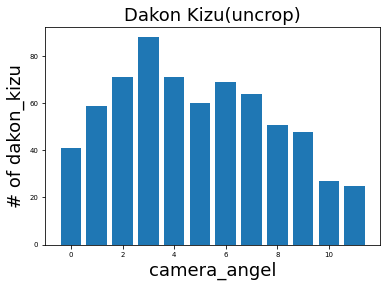

In [ ]:
#plot the result
x = df_counter_uncrop.index
y = df_counter_uncrop['has_kizu_dakon']
plt.title("Dakon Kizu(uncrop)", fontsize=18)
plt.xlabel("camera_angel", fontsize=18)
plt.ylabel("# of dakon_kizu", fontsize=18)
plt.tick_params(labelsize=7)
plt.bar(x,y)
plt.savefig("./Figure/Dakon_CamAngle.png")

print(sum(y))

648


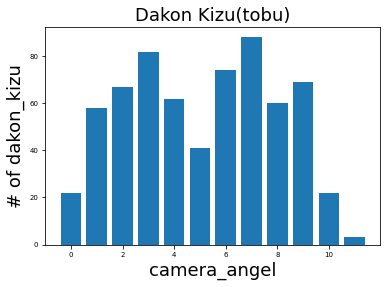

In [ ]:
#plot the result
x = df_counter_tobu.index
y = df_counter_tobu['has_kizu_dakon']
plt.title("Dakon Kizu(tobu)", fontsize=18)
plt.xlabel("camera_angel", fontsize=18)
plt.ylabel("# of dakon_kizu", fontsize=18)
plt.tick_params(labelsize=7)
plt.bar(x,y)
plt.savefig("./Figure/Dakon_CamAngle_tobu.png")

print(sum(y))

617


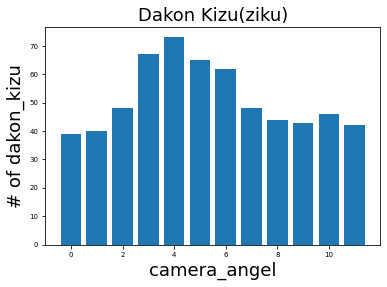

In [ ]:
#plot the result
x = df_counter_ziku.index
y = df_counter_ziku['has_kizu_dakon']
plt.title("Dakon Kizu(ziku)", fontsize=18)
plt.xlabel("camera_angel", fontsize=18)
plt.ylabel("# of dakon_kizu", fontsize=18)
plt.tick_params(labelsize=7)
plt.bar(x,y)
plt.savefig("./Figure/Dakon_CamAngle_ziku.png")

print(sum(y))

15


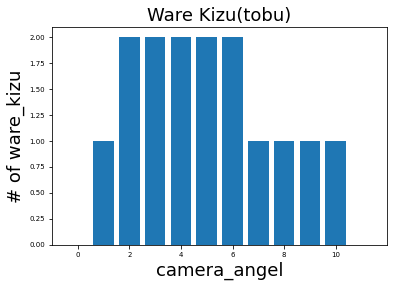

In [ ]:
#plot the result
x = df_counter_tobu.index
y = df_counter_tobu['has_kizu_ware']
plt.title("Ware Kizu(tobu)", fontsize=18)
plt.xlabel("camera_angel", fontsize=18)
plt.ylabel("# of ware_kizu", fontsize=18)
plt.tick_params(labelsize=7)
plt.bar(x,y)
plt.savefig("./Figure/Ware_CamAngle_tobu.png")

print(sum(y))

0


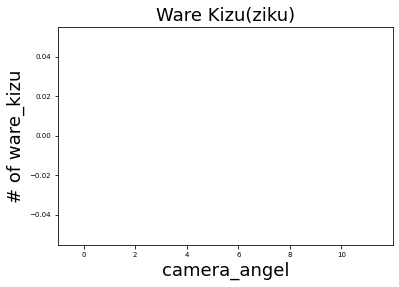

In [ ]:
#plot the result
x = df_counter_ziku.index
y = df_counter_ziku['has_kizu_ware']
plt.title("Ware Kizu(ziku)", fontsize=18)
plt.xlabel("camera_angel", fontsize=18)
plt.ylabel("# of ware_kizu", fontsize=18)
plt.tick_params(labelsize=7)
plt.bar(x,y)
plt.savefig("./Figure/Ware_CamAngle_ziku.png")

print(sum(y))

120.0


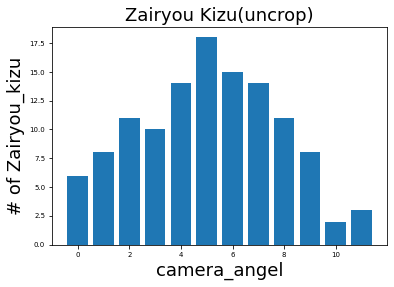

In [ ]:
#plot the result
x = df_counter_uncrop.index
y = df_counter_uncrop['has_kizu_zairyou']
plt.title("Zairyou Kizu(uncrop)", fontsize=18)
plt.xlabel("camera_angel", fontsize=18)
plt.ylabel("# of Zairyou_kizu", fontsize=18)
plt.tick_params(labelsize=7)
plt.bar(x,y)
plt.savefig("./Figure/Zairyou_CamAngle.png")

print(sum(y))

68


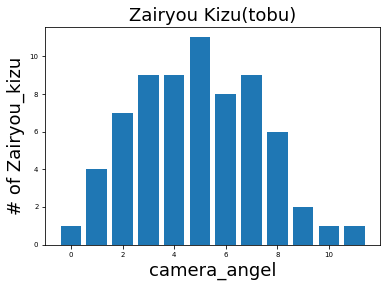

In [ ]:
#plot the result
x = df_counter_tobu.index
y = df_counter_tobu['has_kizu_zairyou']
plt.title("Zairyou Kizu(tobu)", fontsize=18)
plt.xlabel("camera_angel", fontsize=18)
plt.ylabel("# of Zairyou_kizu", fontsize=18)
plt.tick_params(labelsize=7)
plt.bar(x,y)
plt.savefig("./Figure/Zairyou_CamAngle_tobu.png")

print(sum(y))

180


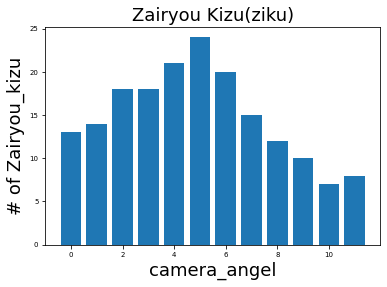

In [ ]:
#plot the result
x = df_counter_ziku.index
y = df_counter_ziku['has_kizu_zairyou']
plt.title("Zairyou Kizu(ziku)", fontsize=18)
plt.xlabel("camera_angel", fontsize=18)
plt.ylabel("# of Zairyou_kizu", fontsize=18)
plt.tick_params(labelsize=7)
plt.bar(x,y)
plt.savefig("./Figure/Zairyou_CamAngle_ziku.png")

print(sum(y))

944.0


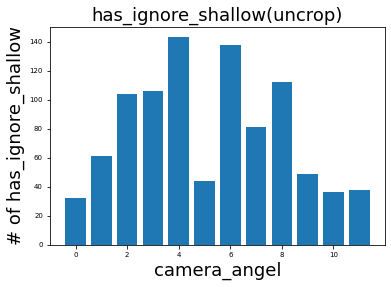

In [ ]:
#plot the result
x = df_counter_uncrop.index
y = df_counter_uncrop['has_ignore_shallow']
plt.title("has_ignore_shallow(uncrop)", fontsize=18)
plt.xlabel("camera_angel", fontsize=18)
plt.ylabel("# of has_ignore_shallow", fontsize=18)
plt.tick_params(labelsize=7)
plt.bar(x,y)
plt.savefig("./Figure/ignore_shallow_CamAngle.png")

print(sum(y))

1444


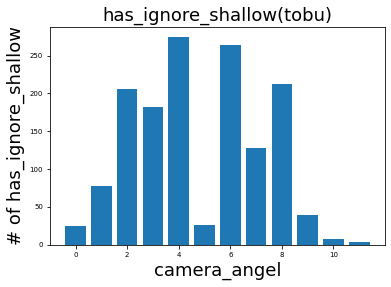

In [ ]:
#plot the result
x = df_counter_tobu.index
y = df_counter_tobu['has_ignore_shallow']
plt.title("has_ignore_shallow(tobu)", fontsize=18)
plt.xlabel("camera_angel", fontsize=18)
plt.ylabel("# of has_ignore_shallow", fontsize=18)
plt.tick_params(labelsize=7)
plt.bar(x,y)
plt.savefig("./Figure/ignore_shallow_CamAngle_tobu.png")

print(sum(y))

739


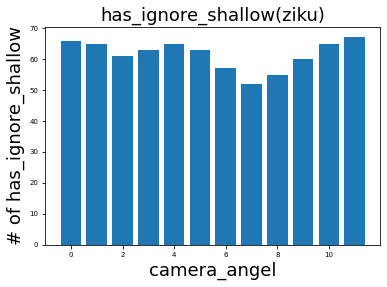

In [ ]:
#plot the result
x = df_counter_ziku.index
y = df_counter_ziku['has_ignore_shallow']
plt.title("has_ignore_shallow(ziku)", fontsize=18)
plt.xlabel("camera_angel", fontsize=18)
plt.ylabel("# of has_ignore_shallow", fontsize=18)
plt.tick_params(labelsize=7)
plt.bar(x,y)
plt.savefig("./Figure/ignore_shallow_CamAngle_ziku.png")

print(sum(y))

268.0


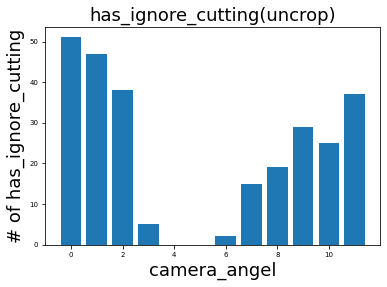

In [ ]:
#plot the result
x = df_counter_uncrop.index
y = df_counter_uncrop['has_ignore_cutting']
plt.title("has_ignore_cutting(uncrop)", fontsize=18)
plt.xlabel("camera_angel", fontsize=18)
plt.ylabel("# of has_ignore_cutting", fontsize=18)
plt.tick_params(labelsize=7)
plt.bar(x,y)
plt.savefig("./Figure/ignore_cutting_CamAngle.png")

print(sum(y))

357


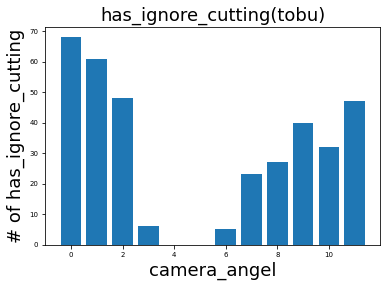

In [ ]:
#plot the result
x = df_counter_tobu.index
y = df_counter_tobu['has_ignore_cutting']
plt.title("has_ignore_cutting(tobu)", fontsize=18)
plt.xlabel("camera_angel", fontsize=18)
plt.ylabel("# of has_ignore_cutting", fontsize=18)
plt.tick_params(labelsize=7)
plt.bar(x,y)
plt.savefig("./Figure/ignore_cutting_CamAngle_tobu.png")

print(sum(y))

0


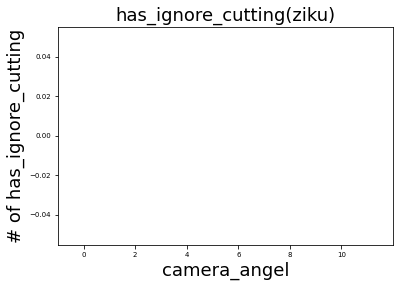

In [ ]:
#plot the result
x = df_counter_ziku.index
y = df_counter_ziku['has_ignore_cutting']
plt.title("has_ignore_cutting(ziku)", fontsize=18)
plt.xlabel("camera_angel", fontsize=18)
plt.ylabel("# of has_ignore_cutting", fontsize=18)
plt.tick_params(labelsize=7)
plt.bar(x,y)
plt.savefig("./Figure/ignore_cutting_CamAngle_ziku.png")

print(sum(y))

25.0


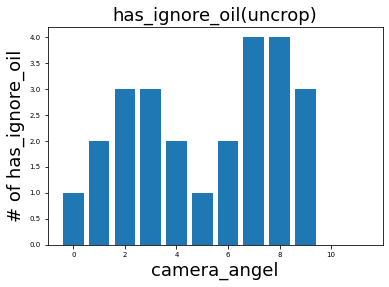

In [ ]:
#plot the result
x = df_counter_uncrop.index
y = df_counter_uncrop['has_ignore_oil']
plt.title("has_ignore_oil(uncrop)", fontsize=18)
plt.xlabel("camera_angel", fontsize=18)
plt.ylabel("# of has_ignore_oil", fontsize=18)
plt.tick_params(labelsize=7)
plt.bar(x,y)
plt.savefig("./Figure/ignore_oil_CamAngle.png")

print(sum(y))

53


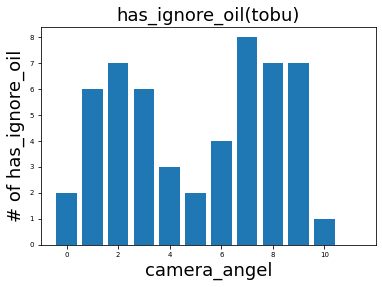

In [ ]:
#plot the result
x = df_counter_tobu.index
y = df_counter_tobu['has_ignore_oil']
plt.title("has_ignore_oil(tobu)", fontsize=18)
plt.xlabel("camera_angel", fontsize=18)
plt.ylabel("# of has_ignore_oil", fontsize=18)
plt.tick_params(labelsize=7)
plt.bar(x,y)
plt.savefig("./Figure/ignore_oil_CamAngle_tobu.png")

print(sum(y))

10


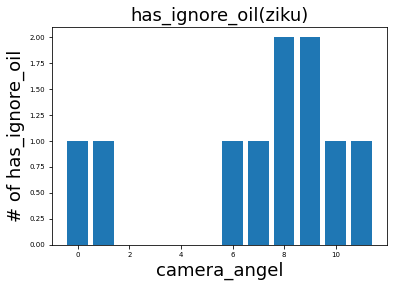

In [ ]:
#plot the result
x = df_counter_ziku.index
y = df_counter_ziku['has_ignore_oil']
plt.title("has_ignore_oil(ziku)", fontsize=18)
plt.xlabel("camera_angel", fontsize=18)
plt.ylabel("# of has_ignore_oil", fontsize=18)
plt.tick_params(labelsize=7)
plt.bar(x,y)
plt.savefig("./Figure/ignore_oil_CamAngle_ziku.png")

print(sum(y))

In [ ]:
anomaly_count = pd.DataFrame(np.zeros(24).reshape(12,2),
                            columns=['nomaly','anomaly'],
                            index=['cam_0', 'cam_1','cam_2','cam_3','cam_4','cam_5','cam_6','cam_7','cam_8','cam_9','cam_10','cam_11'])
for i in range(len(df)):
    if df['is_anomaly_image'][i] == 1.0:
        anomaly_count['anomaly'][df['camera_angle'][i]] += 1
    else:
        anomaly_count['nomaly'][df['camera_angle'][i]] += 1

anomaly_count

,nomaly,anomaly
cam_0,942.0,144.0
cam_1,869.0,217.0
cam_2,826.0,260.0
cam_3,762.0,324.0
cam_4,789.0,297.0
cam_5,834.0,252.0
cam_6,787.0,299.0
cam_7,796.0,290.0
cam_8,857.0,229.0
cam_9,848.0,238.0


In [ ]:
sum(anomaly_count['nomaly'])

10225.0

In [ ]:
sum(anomaly_count['anomaly'])

2807.0

In [ ]:
#Count the "Actual" number of wound
'''
I think the number of wound which I have calucualted ever is not the number of wound, because if there is wound at camera_angle "3", in most of case, the camera_angle "2" and "4" find 
the wound. So, the acutual the number of wound is "1",but now I counted 3.
'''
df2 = df_uncrop
df2['new_dakon_kizu'] = 0

'''
new_dakon_kizu is an Acutual the number of kizu.

         has_dakon_kizu new_dakon_kizu  
cam_angle
0              0             0
1              1             1
2              1             0
3              0             0
4              1      |\     0
5              1    |-  \    1
6              1    |-  /    0
7              0      |/     0
8              1             0
9              1             1
10             1             0
11             1             0
'''

for i in range(0,df2.shape[0],12):
    flag = 0
    temp_cam_angle = 0
    for k in range(12):
        if df2['has_kizu_dakon'][i+k] == 1 and flag == 0:
            flag = 1
            temp_cam_id = i
        if df2['has_kizu_dakon'][i+k] == 0 and flag == 1:
            df2['new_dakon_kizu'][i+int((temp_cam_angle+k)/2)] = 1
            flag = 0
            temp_cam_angle = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#check the new_dakon_kizu
df2['new_dakon_kizu'].head(10)

0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    0
8    0
9    0
Name: new_dakon_kizu, dtype: int64

In [ ]:
#count actual the number of dakon kizu by camera_angle
dakon_camera_num = [0 for _ in range(12)]
for i in range(df2.shape[0]):
    if df2['new_dakon_kizu'][i] == 1:
        dakon_camera_num[int(df2['camera_angle'][i])] += 1

In [ ]:
dakon_camera_num

[13, 21, 73, 56, 58, 79, 0, 0, 0, 0, 0, 0]

In [ ]:
#This is the same proces as dakon_kizu
#ware
df2['new_ware_kizu'] = 0
for i in range(0,df2.shape[0],12):
    flag = 0
    temp_cam_angle = 0
    for k in range(12):
        if df2['has_kizu_ware'][i+k] == 1 and flag == 0:
            flag = 1
            temp_cam_id = i
        if df2['has_kizu_ware'][i+k] == 0 and flag == 1:
            df2['new_ware_kizu'][i+int((temp_cam_angle+k)/2)] = 1
            flag = 0
            temp_cam_angle = 0
            
ware_camera_num = [0 for _ in range(12)]
for i in range(df2.shape[0]):
    if df2['new_ware_kizu'][i] == 1:
        ware_camera_num[int(df2['camera_angle'][i])] += 1

        
#zairyou 
df2['new_zairyou_kizu'] = 0
for i in range(0,df2.shape[0],12):
    flag = 0
    temp_cam_angle = 0
    for k in range(12):
        if df2['has_kizu_zairyou'][i+k] == 1 and flag == 0:
            flag = 1
            temp_cam_id = i
        if df2['has_kizu_zairyou'][i+k] == 0 and flag == 1:
            df2['new_zairyou_kizu'][i+int((temp_cam_angle+k)/2)] = 1
            flag = 0
            temp_cam_angle = 0
zairyou_camera_num = [0 for _ in range(12)]
for i in range(df2.shape[0]):
    if df2['new_zairyou_kizu'][i] == 1:
        zairyou_camera_num[int(df2['camera_angle'][i])] += 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


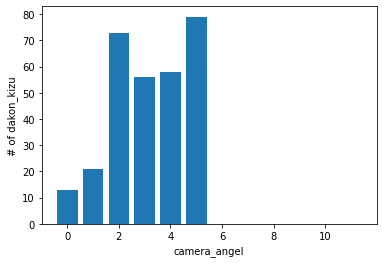

In [ ]:
#plot the result
x = [i for i in range(12)]
plt.bar(x,dakon_camera_num)
plt.xlabel("camera_angel")
plt.ylabel("# of dakon_kizu")
plt.savefig("Figure/#_of_dakon_kizu")

2


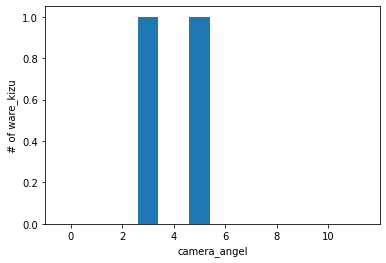

In [ ]:
#plot the result
x = [i for i in range(12)]
plt.bar(x,ware_camera_num)
plt.xlabel("camera_angel")
plt.ylabel("# of ware_kizu")
plt.savefig("Figure/#_of_ware_kizu")
print(sum(ware_camera_num))

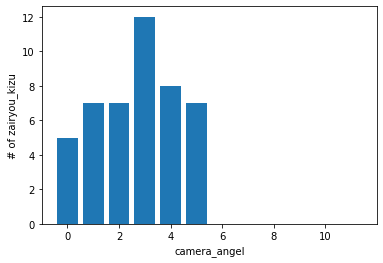

In [ ]:
#plot the result
x = [i for i in range(12)]
plt.bar(x,zairyou_camera_num)
plt.xlabel("camera_angel")
plt.ylabel("# of zairyou_kizu")
plt.savefig("Figure/#_of_zairyou_kizu")